In [1]:
import os

import numpy as np

from synthacc.ground_models import LayerModel
from synthacc.source.mechanism import FocalMechanism
from synthacc.source.moment import MomentTensor
from synthacc.greens_functions import GenericGreensFunction
from synthacc.io import axitra, qseis
from synthacc.recordings import plot_seismograms

In [2]:
root_folder = %pwd

a_folder = os.path.join(root_folder, 'workspaces', 'axitra')
q_folder = os.path.join(root_folder, 'workspaces', 'qseis')

nfreqs = 512
nsamps = 1024
duration = 60

l_ground_model = LayerModel([50000], [5000], [2886], [2700], [1000], [500])
c_ground_model = l_ground_model.to_continuous_model()

moment = 1

src = (0, 0, 10000)
distance = 15000
rcv = (distance, 0, 0)

filter_spec = ('lowpass', 2)
plot_duration = 10

In [3]:
Axitra = axitra.Wrapper(a_folder, nfreqs=nfreqs, duration=duration, ground_model=l_ground_model)
Qseis = qseis.Wrapper(q_folder, nsamps=nsamps, duration=duration, ground_model=c_ground_model)

In [4]:
## Elementary moment tensors of Kikuchi & Kanamori (1991) + m5 * 90 to create compensated linear vector dipole

fm1 = FocalMechanism( 0, 90,   0)
fm2 = FocalMechanism(45, 90, 180)
fm3 = FocalMechanism( 0, 90, -90)
fm4 = FocalMechanism(90, 90, +90)
fm5 = FocalMechanism(90, 45, +90)
fmc = FocalMechanism( 0, 45, +90)
fm6 = None

mt1 = fm1.get_moment_tensor(moment)
mt2 = fm2.get_moment_tensor(moment)
mt3 = fm3.get_moment_tensor(moment)
mt4 = fm4.get_moment_tensor(moment)
mt5 = fm5.get_moment_tensor(moment)
mtc = fmc.get_moment_tensor(moment)
mt6 = MomentTensor(1, 1, 1, 0, 0, 0)

In [5]:
a_rec_m1 = Axitra.get_recording(src, rcv, moment, focal_mechanism=fm1).filter(*filter_spec)
a_rec_m2 = Axitra.get_recording(src, rcv, moment, focal_mechanism=fm2).filter(*filter_spec)
a_rec_m3 = Axitra.get_recording(src, rcv, moment, focal_mechanism=fm3).filter(*filter_spec)
a_rec_m4 = Axitra.get_recording(src, rcv, moment, focal_mechanism=fm4).filter(*filter_spec)
a_rec_m5 = Axitra.get_recording(src, rcv, moment, focal_mechanism=fm5).filter(*filter_spec)
a_rec_mc = Axitra.get_recording(src, rcv, moment, focal_mechanism=fmc).filter(*filter_spec)
a_rec_m6 = Axitra.get_recording(src, rcv, moment, focal_mechanism=fm6).filter(*filter_spec)

In [6]:
q_rec_m1 = Qseis.get_recording(src, rcv, mt1, components='ZRT').filter(*filter_spec)
q_rec_m2 = Qseis.get_recording(src, rcv, mt2, components='ZRT').filter(*filter_spec)
q_rec_m3 = Qseis.get_recording(src, rcv, mt3, components='ZRT').filter(*filter_spec)
q_rec_m4 = Qseis.get_recording(src, rcv, mt4, components='ZRT').filter(*filter_spec)
q_rec_m5 = Qseis.get_recording(src, rcv, mt5, components='ZRT').filter(*filter_spec)
q_rec_mc = Qseis.get_recording(src, rcv, mtc, components='ZRT').filter(*filter_spec)
q_rec_m6 = Qseis.get_recording(src, rcv, mt6, components='ZRT').filter(*filter_spec)

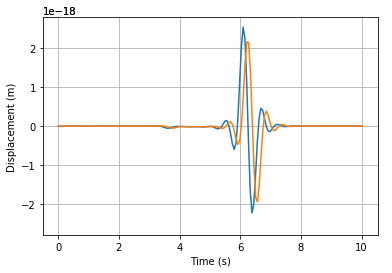

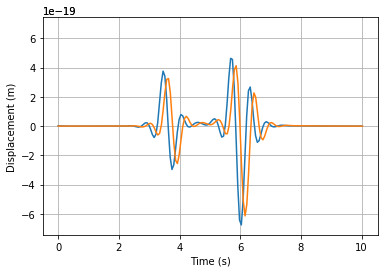

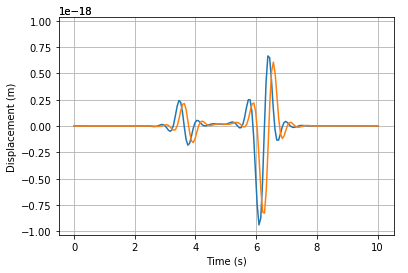

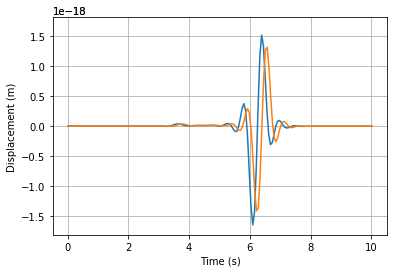

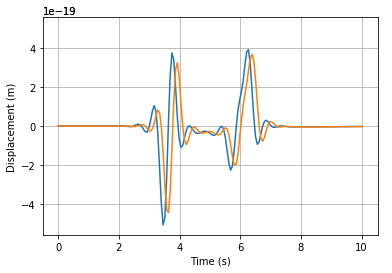

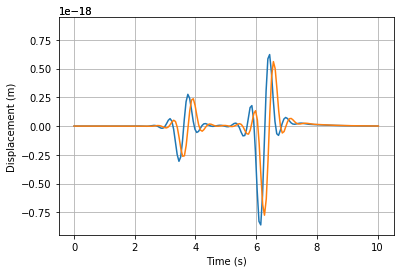

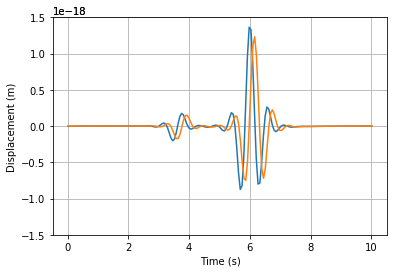

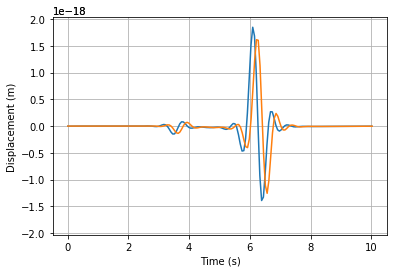

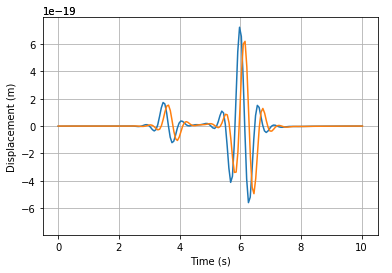

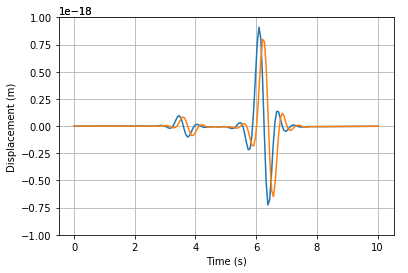

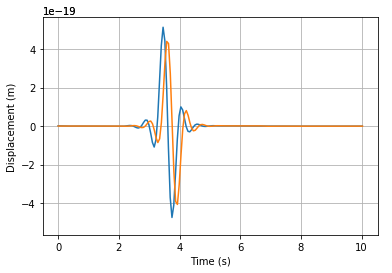

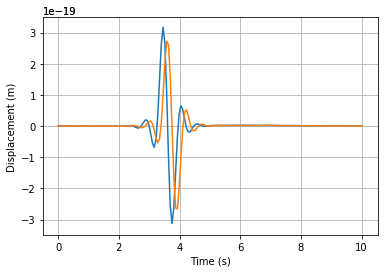

In [7]:
plot_seismograms([[a_rec_m1.get_component('E'), q_rec_m1.get_component('T'),]], e_time=plot_duration)

plot_seismograms([[a_rec_m2.get_component('N'), q_rec_m2.get_component('R'),]], e_time=plot_duration)
plot_seismograms([[a_rec_m2.get_component('Z'), q_rec_m2.get_component('Z'),]], e_time=plot_duration)

plot_seismograms([[a_rec_m3.get_component('E'), q_rec_m3.get_component('T'),]], e_time=plot_duration)

plot_seismograms([[a_rec_m4.get_component('N'), q_rec_m4.get_component('R'),]], e_time=plot_duration)
plot_seismograms([[a_rec_m4.get_component('Z'), q_rec_m4.get_component('Z'),]], e_time=plot_duration)

plot_seismograms([[a_rec_m5.get_component('N'), q_rec_m5.get_component('R'),]], e_time=plot_duration)
plot_seismograms([[a_rec_m5.get_component('Z'), q_rec_m5.get_component('Z'),]], e_time=plot_duration)

plot_seismograms([[a_rec_mc.get_component('N'), q_rec_mc.get_component('R'),]], e_time=plot_duration)
plot_seismograms([[a_rec_mc.get_component('Z'), q_rec_mc.get_component('Z'),]], e_time=plot_duration)

plot_seismograms([[a_rec_m6.get_component('N'), q_rec_m6.get_component('R'),]], e_time=plot_duration)
plot_seismograms([[a_rec_m6.get_component('Z'), q_rec_m6.get_component('Z'),]], e_time=plot_duration)

In [8]:
## Generic Green's function components of Minson & Dreger (2008)

ZSS = a_rec_m2.get_component('Z')
RSS = a_rec_m2.get_component('N')
TSS = a_rec_m1.get_component('E') * -1
ZDS = a_rec_m4.get_component('Z')
RDS = a_rec_m4.get_component('N')
TDS = a_rec_m3.get_component('E') * -1
ZDD = a_rec_m5.get_component('Z') + a_rec_mc.get_component('Z')
RDD = a_rec_m5.get_component('N') + a_rec_mc.get_component('N')
ZEP = a_rec_m6.get_component('Z')
REP = a_rec_m6.get_component('N')

components = np.zeros((10, len(ZSS)))
components[0] = ZSS.amplitudes
components[1] = RSS.amplitudes
components[2] = TSS.amplitudes
components[3] = ZDS.amplitudes
components[4] = RDS.amplitudes
components[5] = TDS.amplitudes
components[6] = ZDD.amplitudes
components[7] = RDD.amplitudes
components[8] = ZEP.amplitudes
components[9] = REP.amplitudes

gf = GenericGreensFunction(ZSS.time_delta, components, 'dis')

azimuth = 0

r1 = gf.get_recording(azimuth, mt1)
r2 = gf.get_recording(azimuth, mt2)
r3 = gf.get_recording(azimuth, mt3)
r4 = gf.get_recording(azimuth, mt4)
r5 = gf.get_recording(azimuth, mt5)
rc = gf.get_recording(azimuth, mtc)
r6 = gf.get_recording(azimuth, mt6)

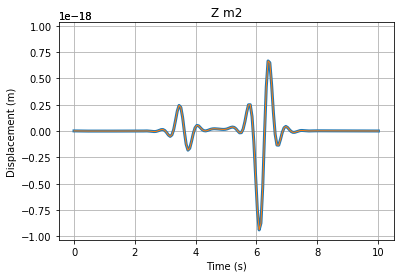

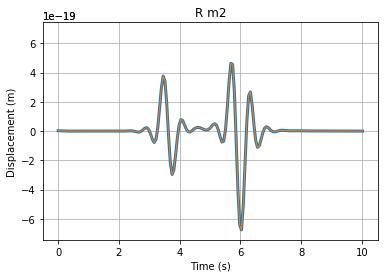

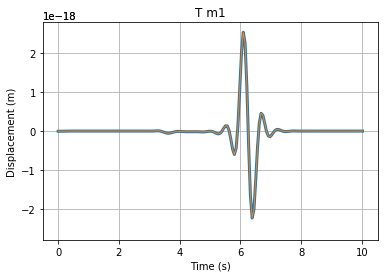

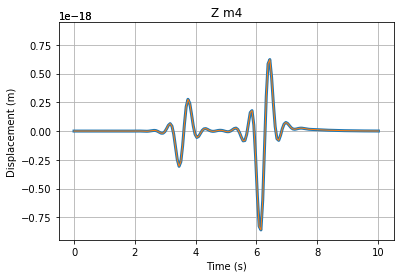

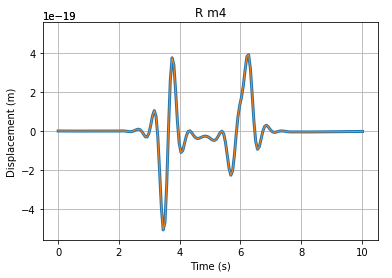

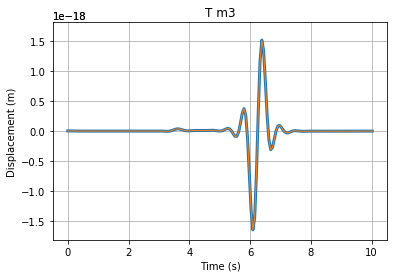

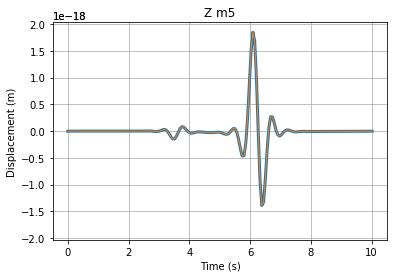

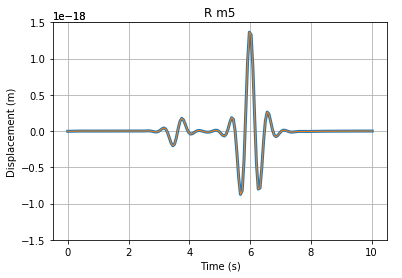

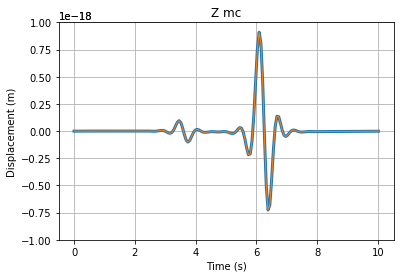

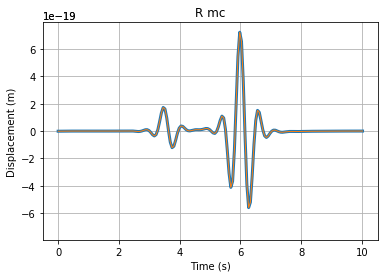

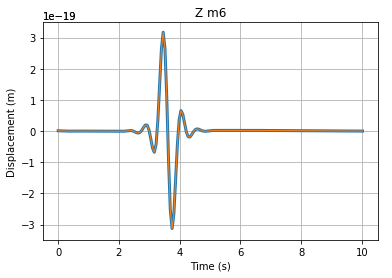

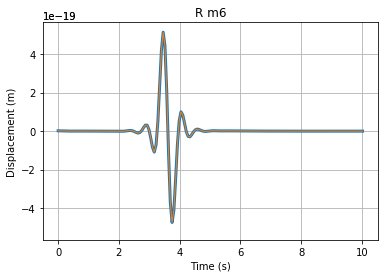

In [9]:
plot_seismograms([[a_rec_m2.get_component('Z'), r2.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m2')
plot_seismograms([[a_rec_m2.get_component('N'), r2.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m2')
plot_seismograms([[a_rec_m1.get_component('E'), r1.get_component('T')]], widths=[[3, 1]], e_time=plot_duration, title='T m1')
plot_seismograms([[a_rec_m4.get_component('Z'), r4.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m4')
plot_seismograms([[a_rec_m4.get_component('N'), r4.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m4')
plot_seismograms([[a_rec_m3.get_component('E'), r3.get_component('T')]], widths=[[3, 1]], e_time=plot_duration, title='T m3')
plot_seismograms([[a_rec_m5.get_component('Z'), r5.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m5')
plot_seismograms([[a_rec_m5.get_component('N'), r5.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m5')
plot_seismograms([[a_rec_mc.get_component('Z'), rc.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z mc')
plot_seismograms([[a_rec_mc.get_component('N'), rc.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R mc')
plot_seismograms([[a_rec_m6.get_component('Z'), r6.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m6')
plot_seismograms([[a_rec_m6.get_component('N'), r6.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m6')

In [10]:
a_gf = Axitra.get_greens_function(src[-1], distance, rcv[-1])

In [11]:
r1 = a_gf.get_recording(azimuth, mt1).filter(*filter_spec)
r2 = a_gf.get_recording(azimuth, mt2).filter(*filter_spec)
r3 = a_gf.get_recording(azimuth, mt3).filter(*filter_spec)
r4 = a_gf.get_recording(azimuth, mt4).filter(*filter_spec)
r5 = a_gf.get_recording(azimuth, mt5).filter(*filter_spec)
rc = a_gf.get_recording(azimuth, mtc).filter(*filter_spec)
r6 = a_gf.get_recording(azimuth, mt6).filter(*filter_spec)

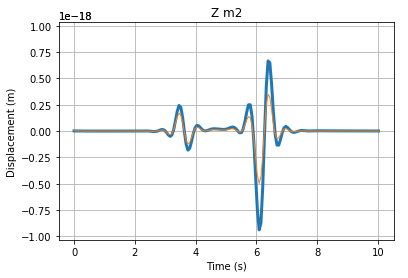

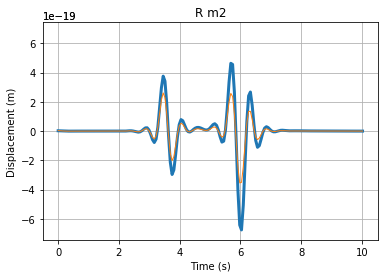

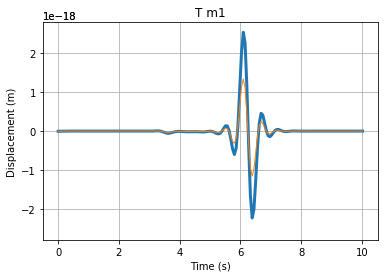

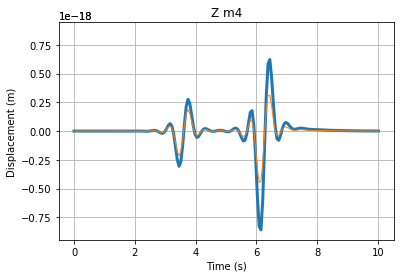

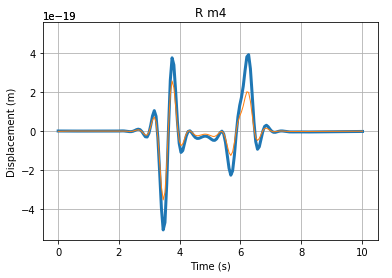

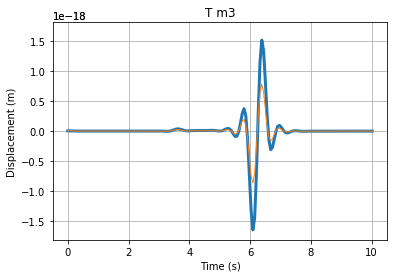

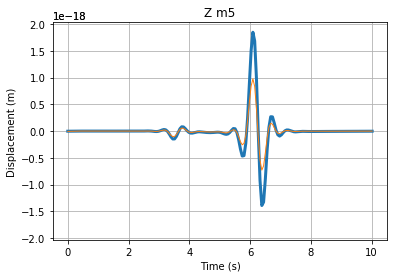

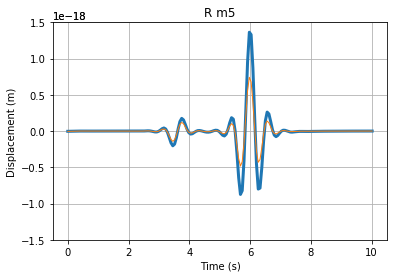

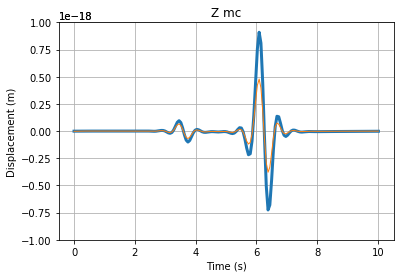

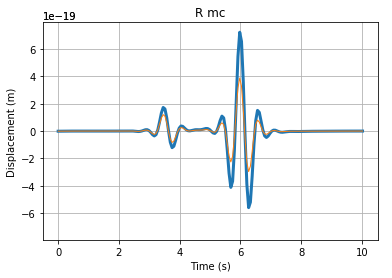

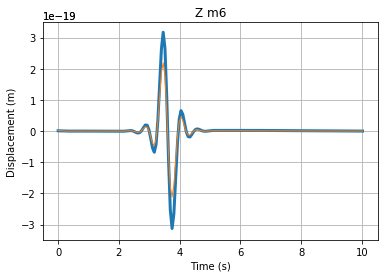

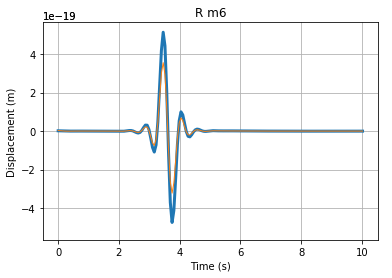

In [12]:
plot_seismograms([[a_rec_m2.get_component('Z'), r2.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m2')
plot_seismograms([[a_rec_m2.get_component('N'), r2.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m2')
plot_seismograms([[a_rec_m1.get_component('E'), r1.get_component('T')]], widths=[[3, 1]], e_time=plot_duration, title='T m1')
plot_seismograms([[a_rec_m4.get_component('Z'), r4.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m4')
plot_seismograms([[a_rec_m4.get_component('N'), r4.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m4')
plot_seismograms([[a_rec_m3.get_component('E'), r3.get_component('T')]], widths=[[3, 1]], e_time=plot_duration, title='T m3')
plot_seismograms([[a_rec_m5.get_component('Z'), r5.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m5')
plot_seismograms([[a_rec_m5.get_component('N'), r5.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m5')
plot_seismograms([[a_rec_mc.get_component('Z'), rc.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z mc')
plot_seismograms([[a_rec_mc.get_component('N'), rc.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R mc')
plot_seismograms([[a_rec_m6.get_component('Z'), r6.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m6')
plot_seismograms([[a_rec_m6.get_component('N'), r6.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m6')

In [13]:
q_gf = Qseis.get_greens_function(src[-1], distance, rcv[-1])

In [14]:
r1 = q_gf.get_recording(azimuth, mt1).filter(*filter_spec)
r2 = q_gf.get_recording(azimuth, mt2).filter(*filter_spec)
r3 = q_gf.get_recording(azimuth, mt3).filter(*filter_spec)
r4 = q_gf.get_recording(azimuth, mt4).filter(*filter_spec)
r5 = q_gf.get_recording(azimuth, mt5).filter(*filter_spec)
rc = q_gf.get_recording(azimuth, mtc).filter(*filter_spec)
r6 = q_gf.get_recording(azimuth, mt6).filter(*filter_spec)

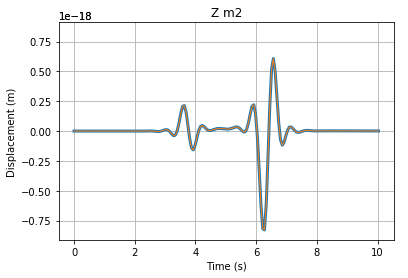

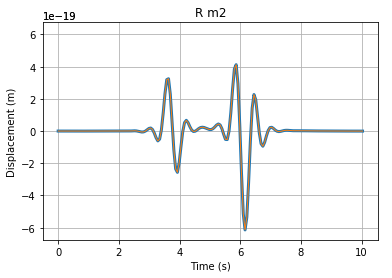

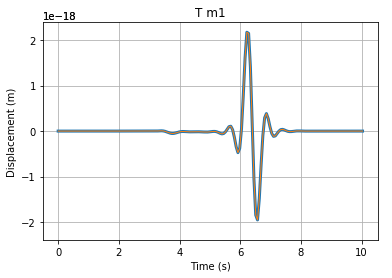

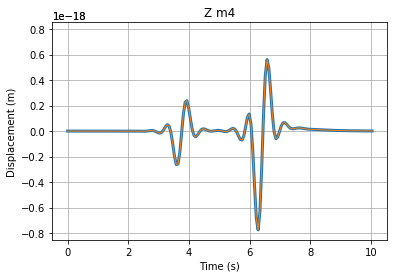

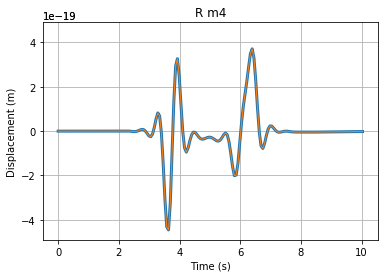

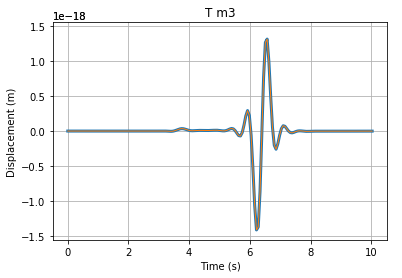

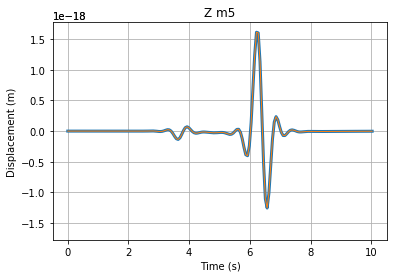

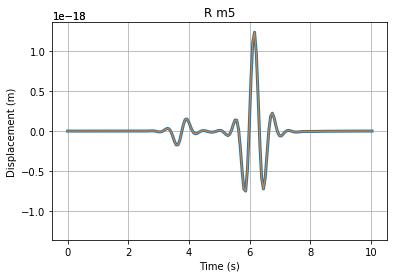

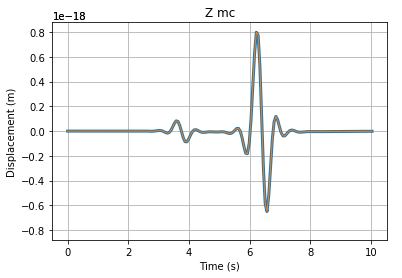

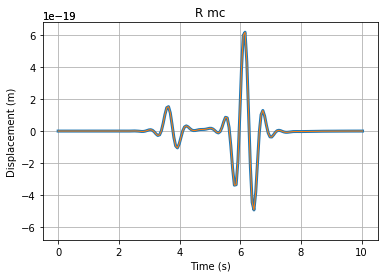

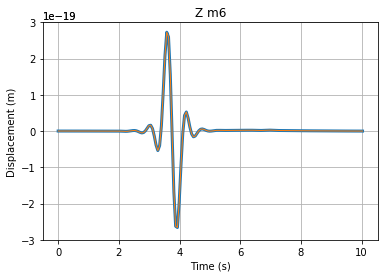

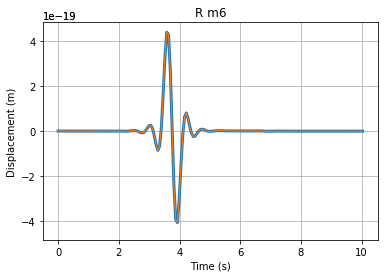

In [15]:
plot_seismograms([[q_rec_m2.get_component('Z'), r2.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m2')
plot_seismograms([[q_rec_m2.get_component('R'), r2.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m2')
plot_seismograms([[q_rec_m1.get_component('T'), r1.get_component('T')]], widths=[[3, 1]], e_time=plot_duration, title='T m1')
plot_seismograms([[q_rec_m4.get_component('Z'), r4.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m4')
plot_seismograms([[q_rec_m4.get_component('R'), r4.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m4')
plot_seismograms([[q_rec_m3.get_component('T'), r3.get_component('T')]], widths=[[3, 1]], e_time=plot_duration, title='T m3')
plot_seismograms([[q_rec_m5.get_component('Z'), r5.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m5')
plot_seismograms([[q_rec_m5.get_component('R'), r5.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m5')
plot_seismograms([[q_rec_mc.get_component('Z'), rc.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z mc')
plot_seismograms([[q_rec_mc.get_component('R'), rc.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R mc')
plot_seismograms([[q_rec_m6.get_component('Z'), r6.get_component('Z')]], widths=[[3, 1]], e_time=plot_duration, title='Z m6')
plot_seismograms([[q_rec_m6.get_component('R'), r6.get_component('R')]], widths=[[3, 1]], e_time=plot_duration, title='R m6')